In [1]:
import yfinance as yf
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from fbprophet import Prophet
import numpy as np
import statsmodels.api as sm
analyser = SentimentIntensityAnalyzer()
import datetime

In [2]:
SP5 = pd.read_csv('S&P.csv')
SP5.columns

Index(['Symbol', 'Security', 'SECFilings', 'GICSSector', 'GICSSubIndustry',
       'HeadquartersLocation', 'DateFirstAdded', 'CIK', 'Founded',
       'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [3]:
sectors = SP5['GICSSector'].unique()

In [4]:
res = {}
for sector in sectors:
    sector_df = SP5[SP5['GICSSector'] == sector]
    for sym in sector_df['Symbol']:
        stock = yf.Ticker(sym)
        res[sym] = stock

In [45]:
sectors

array(['Communication Services', 'Consumer Discretionary',
       'Consumer Staples', 'Energy', 'Financials', 'Health Care',
       'Industrials', 'Information Technology', 'Materials',
       'Real Estate', 'Utilities', nan], dtype=object)

In [ ]:
detail = pd.DataFrame()

for sym in SP5['Symbol']:
    try:
        temp = pd.DataFrame([yf.Ticker(sym).info])
        detail = detail.append(temp)
        print(detail)
    except:
        pass

In [6]:
# detail.to_csv('detail.csv')
detail = pd.read_csv('detail.csv')
detail = detail.merge(SP5, left_on='symbol', right_on='Symbol', how='inner')
df_mktcap = detail[['symbol', 'marketCap', 'GICSSector']]
df_mktcap

,symbol,marketCap,GICSSector
0,ATVI,61742039040,Communication Services
1,GOOGL,1031408713728,Communication Services
2,GOOG,1031407534080,Communication Services
3,T,208335011840,Communication Services
4,CHTR,129100718080,Communication Services
5,DISCA,11652900864,Communication Services
6,DISCK,11652905984,Communication Services
7,DISH,17461139456,Communication Services
8,EA,38459506688,Communication Services
9,FB,750720974848,Communication Services


In [7]:
df_top_10 = df_mktcap.sort_values(['GICSSector', 'marketCap'], ascending=False).groupby('GICSSector').head(10)

In [9]:
df_top_10

,symbol,marketCap,GICSSector
339,D,68555096064,Utilities
346,SO,56281165824,Utilities
333,AEP,40297021440,Utilities
343,EXC,36036710400,Utilities
345,SRE,34954178560,Utilities
347,WEC,31158669312,Utilities
342,ES,28694179840,Utilities
334,AWK,25870495744,Utilities
338,ED,25314732032,Utilities
340,DTE,22933176320,Utilities


In [10]:
def custom_index(sector):
    histories = []
    weights = []
    symbols = df_mktcap[df_mktcap['GICSSector'] == sector]
    for index, row in symbols.iterrows():
        symbol = row['symbol']
        mktcap = row['marketCap']
        history = yf.Ticker(symbol).history(period='4y')
        histories.append(history)
        weights.append(mktcap)
        total_weight = sum(weights)
        w = [x / total_weight for x in weights]
        
    return sum(x*y for x, y in zip(histories, w))

In [11]:
util_hist = custom_index('Utilities')
Communication_Services = custom_index('Communication Services')
Consumer_Discretionary = custom_index('Consumer Discretionary')
Consumer_Staples = custom_index('Consumer Staples')
Energy = custom_index('Energy')
Financials = custom_index('Financials')
Health_Care = custom_index('Health Care')
Industrials = custom_index('Industrials')
Information_Technology = custom_index('Information Technology')
Materials = custom_index('Materials')
Real_Estate = custom_index('Real Estate')
Utilities = custom_index('Utilities')

In [195]:
Communication_Services.to_csv('Communication Services.csv')
Consumer_Discretionary.to_csv('Consumer Discretionary.csv')
Consumer_Staples.to_csv('Consumer Staples.csv')
Energy.to_csv('Energy.csv')
Financials.to_csv('Financials.csv')
Health_Care.to_csv('Health Care.csv')
Industrials.to_csv('Industrials.csv')
Information_Technology.to_csv('Information Technology.csv')
Materials.to_csv('Materials.csv')
Real_Estate.to_csv('Real Estate.csv')
Utilities.to_csv('Utilities.csv')

In [200]:
datasets = [Communication_Services, Consumer_Discretionary, Consumer_Staples, Energy, Financials, Health_Care, Industrials, Information_Technology, Materials, Real_Estate, Utilities]

for dataset in datasets:
    print(dataset[dataset.index>'2020-01-01'])

                   Open         High         Low        Close        Volume  \
Date                                                                          
2020-01-02   781.948810   795.117101  780.942828   794.797121  5.906266e+06   
2020-01-03   783.452719   797.744073  782.505854   790.819808  5.133131e+06   
2020-01-06   784.874985   811.036652  784.421823   810.184715  7.440752e+06   
2020-01-07   811.910368   814.592071  807.008291   809.178418  6.172723e+06   
2020-01-08   808.798370   819.899590  807.704030   815.501504  6.720601e+06   
2020-01-09   824.744495   828.743814  818.241985   823.864886  6.322094e+06   
2020-01-10   828.658146   832.232496  822.577833   828.224007  5.533233e+06   
2020-01-13   831.982847   835.908019  826.562016   834.912514  6.528800e+06   
2020-01-14   834.978757   836.987099  827.873246   829.869287  6.293785e+06   
2020-01-15   830.660828   836.259113  829.860427   834.784392  4.864360e+06   
2020-01-16   838.816217   841.691910  834.823588   8

In [ ]:
ax 

In [229]:
SPX = yf.Ticker("^GSPC")
start='2019-01-01'

hist = SPX.history(interval='5m', period='60d')
interval = []

for index, rows in hist.iterrows():
    interval.append(pd.Interval(index, index+datetime.timedelta(minutes=60), closed='left'))

In [230]:
yf.Ticker('AAPL').info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 137000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides digital content stores and streaming services; AppleCare support services; and iCloud, a cloud service, which stores music, photos, contacts, calendars, mail, documents, and others. In addition, the company offers various service, such as Apple Arcade, a game subscription service; Apple Card, a co-branded credit card; Apple News+, a subscription news and magazine service; and Apple Pay, a cashless payment service, as well 

In [203]:
SHA = yf.Ticker('SHA')
SHA.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-08-17,4390.0,4390.0,4210.0,4350.0,2250,0,0
2020-08-18,4380.0,4380.0,4380.0,4380.0,20,0,0
2020-08-19,4400.0,4400.0,4400.0,4400.0,10,0,0
2020-08-20,4400.0,4400.0,4150.0,4380.0,22620,0,0
2020-08-21,4380.0,4380.0,4300.0,4380.0,12230,0,0
2020-08-24,4390.0,4390.0,4250.0,4250.0,17950,0,0
2020-08-25,4350.0,4350.0,4250.0,4300.0,13250,0,0
2020-08-26,4360.0,4360.0,4250.0,4360.0,60350,0,0
2020-08-27,4360.0,4560.0,4290.0,4380.0,31050,0,0


In [204]:
M = yf.Ticker('MSFT')

In [205]:
M.info['sector']

'Technology'

In [206]:
hist['interval'] = interval

In [207]:
hist['diff'] = hist['Close'].diff()
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,interval,diff
Datetime,,,,,,,,,
2020-06-23 09:30:00-04:00,3138.70,3144.95,3138.70,3141.67,0,0,0,"[2020-06-23 09:30:00, 2020-06-23 10:30:00)",NaN
2020-06-23 09:35:00-04:00,3141.65,3144.79,3139.79,3144.79,47001030,0,0,"[2020-06-23 09:35:00, 2020-06-23 10:35:00)",3.12
2020-06-23 09:40:00-04:00,3147.10,3148.76,3146.31,3148.34,69929375,0,0,"[2020-06-23 09:40:00, 2020-06-23 10:40:00)",3.55
2020-06-23 09:45:00-04:00,3148.31,3148.31,3142.68,3142.86,42190413,0,0,"[2020-06-23 09:45:00, 2020-06-23 10:45:00)",-5.48
2020-06-23 09:50:00-04:00,3142.91,3143.90,3138.33,3138.56,42596511,0,0,"[2020-06-23 09:50:00, 2020-06-23 10:50:00)",-4.30
2020-06-23 09:55:00-04:00,3138.57,3141.22,3137.30,3140.15,35002344,0,0,"[2020-06-23 09:55:00, 2020-06-23 10:55:00)",1.59
2020-06-23 10:00:00-04:00,3140.10,3142.99,3136.96,3138.40,38699520,0,0,"[2020-06-23 10:00:00, 2020-06-23 11:00:00)",-1.75
2020-06-23 10:05:00-04:00,3138.41,3140.67,3134.17,3139.41,33612367,0,0,"[2020-06-23 10:05:00, 2020-06-23 11:05:00)",1.01
2020-06-23 10:10:00-04:00,3139.46,3141.57,3137.88,3140.89,33383853,0,0,"[2020-06-23 10:10:00, 2020-06-23 11:10:00)",1.48


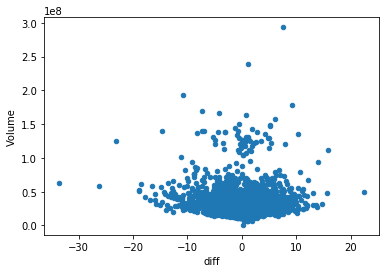

In [208]:
hist_nozero = hist[hist['Volume']!=0]
hist_nozero.plot.scatter(x='diff', y='Volume')

In [209]:
tweet_time = negatives.index[6]
tweet_time

NameError: name 'negatives' is not defined

In [ ]:
hist[hist.index >= tweet_time][:5]['Close'].plot()

In [ ]:
hist.index[1] + datetime.timedelta(minutes = 30)

In [ ]:
hist.Volume.hist(bins=50)

In [ ]:
hist['diff'].plot()

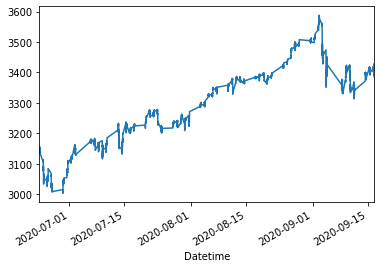

In [210]:
hist['Close'].plot()

In [211]:
df = pd.read_csv('tweets.csv')

In [212]:
df = df[df['text'].notna()]

# Sentiment Analysis

In [213]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [214]:
def score(string):
    return analyser.polarity_scores(string)['compound']

In [215]:
df['scores'] = df['text'].apply(score)

In [216]:
df.sort_values('scores')

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,scores
47216,TwitLonger Beta,It's disgraceful that the Obama Administration...,09-11-2012 19:58:44,199.0,50,false,2.456124e+17,-0.9943
42712,Twitter for Android,@Lrac_Samoht: @realDonaldTrump ... And now Ur ...,04-23-2013 00:18:32,65.0,37,false,3.264902e+17,-0.9868
38479,Twitter for Android,@JoshinAk: @BillyHallowell I just bought one o...,12-12-2013 22:52:03,26.0,84,false,4.112672e+17,-0.9856
17803,Twitter for iPhone,It is outrageous that Poisonous Synthetic Hero...,08-20-2018 17:14:59,28452.0,104181,false,1.031590e+18,-0.9825
18514,Twitter for iPhone,The real big story that affects everybody in A...,06-15-2018 11:56:58,13955.0,0,true,1.007593e+18,-0.9824
3189,Twitter for iPhone,Colin Powell was a pathetic interview today on...,06-08-2020 03:42:18,30594.0,136315,false,1.269837e+18,-0.9800
17872,Twitter for iPhone,The Rigged Russian Witch Hunt goes on and on a...,08-15-2018 14:08:18,19234.0,78501,false,1.029732e+18,-0.9785
16422,Twitter for iPhone,At the request of many I will be reviewing the...,12-16-2018 15:03:22,26065.0,99394,false,1.074319e+18,-0.9783
12025,Twitter for iPhone,...But most importantly @CNN is bad for the US...,09-09-2019 13:01:41,12348.0,50077,false,1.171046e+18,-0.9773
14448,Twitter for iPhone,....employment numbers ever low taxes &amp; re...,05-12-2019 21:35:41,17190.0,72618,false,1.127689e+18,-0.9771


In [217]:
df.to_csv('sentiments.csv')

In [218]:
df=pd.read_csv('sentiments.csv')

In [219]:
df

,Unnamed: 0,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,scores
0,0,Twitter for iPhone,Thank you! https://t.co/1j4qqQQ7eL,09-12-2020 04:21:45,6591.0,28163,false,1.304636e+18,0.4199
1,1,Twitter for iPhone,RT @USAmbIceland: No one has ever done this! T...,09-12-2020 03:17:58,12414.0,0,true,1.304620e+18,0.4374
2,2,Twitter for iPhone,Thank You Samantha. A Star Is Born!!! https://...,09-12-2020 02:53:08,29713.0,107077,false,1.304614e+18,0.5229
3,3,Twitter for iPhone,Thank you Rachael. That is the best way to bea...,09-12-2020 02:46:10,6369.0,26530,false,1.304612e+18,0.5983
4,4,Twitter for iPhone,Great! https://t.co/c9Lte1Spzr,09-12-2020 02:43:21,32239.0,163808,false,1.304612e+18,0.6588
5,5,Twitter Media Studio,A must watch for the good of our DEMOCRACY! ht...,09-12-2020 02:36:03,10811.0,25657,false,1.304610e+18,0.4926
6,6,Twitter for iPhone,RT @realDonaldTrump: New York City must stop t...,09-12-2020 02:29:48,46737.0,0,true,1.304608e+18,-0.7263
7,7,Twitter for iPhone,RT @realDonaldTrump: The Democrats will open u...,09-12-2020 02:29:27,39827.0,0,true,1.304608e+18,-0.3612
8,8,Twitter for iPhone,RT @realDonaldTrump: Suburban voters are pouri...,09-12-2020 02:29:01,33541.0,0,true,1.304608e+18,-0.3400
9,9,Twitter for iPhone,Really Sad! https://t.co/AogCo9aAQc,09-12-2020 02:21:02,9975.0,41155,false,1.304606e+18,-0.5697


In [220]:
df['created_at']=pd.to_datetime(df['created_at'], format='%m-%d-%Y %H:%M:%S', errors='coerce')
df=df.set_index('created_at')

In [221]:
df = df.tz_localize('UTC')

In [222]:
negatives = df[(df.index > '2017-01-20') & (df['scores']<-0.75)]
negatives

,Unnamed: 0,source,text,retweet_count,favorite_count,is_retweet,id_str,scores
created_at,,,,,,,,
2020-09-11 15:36:20+00:00,26,Twitter for iPhone,"RT @WhiteHouse: ""When terrorists raced to dest...",8493.0,0,true,1.304444e+18,-0.8225
2020-09-11 01:53:28+00:00,36,Twitter for iPhone,...the vaccine destroy the suburbs erase your ...,13385.0,57919,false,1.304237e+18,-0.9134
2020-09-10 12:54:48+00:00,63,Twitter for iPhone,Sending out 80 MILLION BALLOTS to people who a...,28623.0,100546,false,1.304041e+18,-0.8169
2020-09-10 12:51:43+00:00,64,Twitter for iPhone,“Comey is a disgraced lier &amp; leaker. Two y...,14842.0,52649,false,1.304040e+18,-0.9231
2020-09-10 12:42:10+00:00,77,Twitter for iPhone,Now @FoxNews is putting on yet another loser J...,13167.0,48428,false,1.304037e+18,-0.9432
2020-09-10 12:39:00+00:00,78,Twitter for iPhone,One of the WORST governors in the USA. Caused ...,14808.0,47941,false,1.304037e+18,-0.8268
2020-09-10 12:31:45+00:00,88,Twitter for iPhone,No Vindman knew the call itself to the Ukraini...,8234.0,25235,false,1.304035e+18,-0.7574
2020-09-10 11:53:49+00:00,92,Twitter for iPhone,RT @NanHayworth: Karl Rove DESTROYING Mr. Bide...,7736.0,0,true,1.304025e+18,-0.7983
2020-09-10 01:00:19+00:00,104,Twitter for iPhone,For years Fake stories and investigations then...,27907.0,117727,false,1.303861e+18,-0.8962


In [223]:
df.set_index('created_at')['scores'].plot()

KeyError: 'created_at'

In [ ]:
df['date'] = df['created_at'].dt.date

In [ ]:
daily_sentiment = df.groupby('date').mean()

In [ ]:
df

In [224]:
daily_sentiment = daily_sentiment.join(hist['diff'])
daily_sentiment

NameError: name 'daily_sentiment' is not defined

In [225]:
daily_sentiment = daily_sentiment[daily_sentiment['diff'].notna()]

NameError: name 'daily_sentiment' is not defined

In [226]:
daily_sentiment.plot.scatter(x='scores', y='diff')

NameError: name 'daily_sentiment' is not defined

In [227]:
daily_sentiment['diff']

NameError: name 'daily_sentiment' is not defined

In [228]:
X = np.array(daily_sentiment['scores'])
y = np.array(daily_sentiment['diff'])
mod = sm.OLS(X, y)
res = mod.fit()

NameError: name 'daily_sentiment' is not defined

In [ ]:
print(res.summary())